# check version of Tensorflow and install required libraries

In [76]:
!ls
!pwd
!df -h
!pip install opencv-python
!python3 -c 'import tensorflow as tf; print(tf.__version__)'  # for Python 3
!pip install keras-vis
!pip freeze

train		   train_terminal_too_much_enhancement.py  train_with_crop.py
train.ipynb	   train_terminal_use_image_in_memory.py   visualize.ipynb
train_terminal.py  train_terminal_v2.py
/home/ec2-user/SageMaker/notebooks/robocar/customkeras
Filesystem      Size  Used Avail Use% Mounted on
devtmpfs         30G   68K   30G   1% /dev
tmpfs            30G     0   30G   0% /dev/shm
/dev/xvda1       55G   54G  552M 100% /
/dev/xvdf       4.8G  108M  4.5G   3% /home/ec2-user/SageMaker
1.8.0
absl-py==0.4.1
alabaster==0.7.10
anaconda-client==1.6.14
anaconda-project==0.8.2
asn1crypto==0.24.0
astor==0.7.1
astroid==1.6.3
astropy==3.0.2
attrs==18.1.0
awscli==1.16.9
Babel==2.5.3
backcall==0.1.0
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
bokeh==0.12.16
boto==2.48.0
boto3==1.8.9
botocore==1.11.9
Bottleneck==1.2.1
certifi==2018.8.24
cffi==1.11.5
chardet==3.0.4
click==6.7
cloudpickle==0.5.3
clyent==1.2.2
colorama==0.3.9
contextlib2

# model files

In [77]:
#!aws s3 sync s3://kyoungsu-robocar-nrt/traindata/blue/ /home/ec2-user/traindata/
!ls /home/ec2-user/ml/model -alh


total 95M
drwxrwxr-x 2 ec2-user ec2-user 4.0K Oct 11 04:40 .
drwxrwxr-x 5 ec2-user ec2-user 4.0K Oct  8 08:32 ..
-rw-rw-r-- 1 ec2-user ec2-user 3.2M Oct  9 06:41 blue-model-1009-gpu
-rw-rw-r-- 1 ec2-user ec2-user 3.2M Oct 11 04:57 car-model.blue-20181011_02-train.
-rw-rw-r-- 1 ec2-user ec2-user 3.8M Oct  9 12:39 car-model.pkl
-rw-rw-r-- 1 ec2-user ec2-user  43M Oct 11 04:29 car-model.pkl-blue-office-20181011_022147
-rw-rw-r-- 1 ec2-user ec2-user  43M Oct  9 11:11 car-model.pkl-blue-use-cache


In [70]:

from tensorflow.python.keras.models import Model, load_model
from vis.utils import utils
from vis.visualization import visualize_saliency, overlay
from keras import activations

model_path = "/home/ec2-user/ml/model/car-model.pkl-blue-office-20181011_022147"
# Build the ResNet50 network with ImageNet weights
model = load_model(model_path)


# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
#layer_idx = utils.find_layer_idx(model, 'conv2d_5')
layer_idx = utils.find_layer_idx(model, 'angle_out')


# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

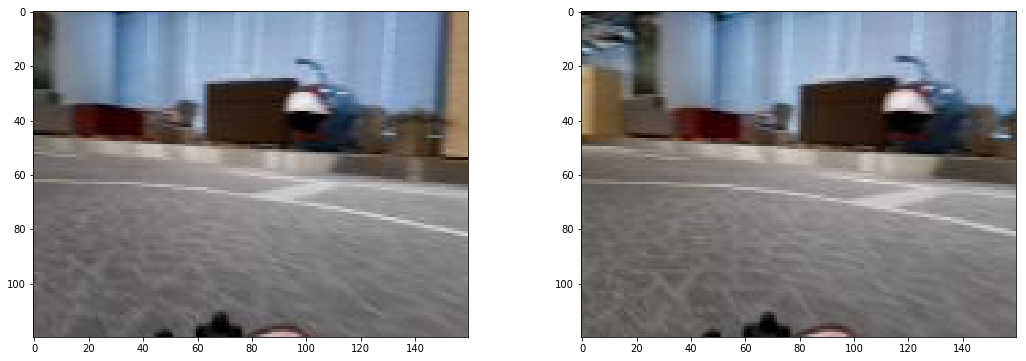

In [71]:
img1_path = '/home/ec2-user/ml/inputdata/20181008_070220/26085_cam-image_array_.jpg'
img2_path = '/home/ec2-user/ml/inputdata/20181008_070220/26095_cam-image_array_.jpg'
img1 = utils.load_img(img1_path)
img2 = utils.load_img(img2_path)

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

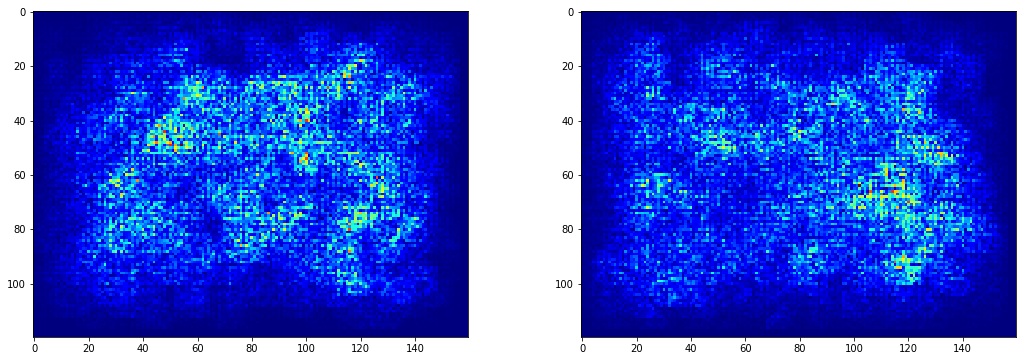

In [72]:
from vis.visualization import visualize_saliency, overlay
f, ax = plt.subplots(1, 2)

DEFINED_FILTER_INDICES=7
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    
    grads = visualize_saliency(model, layer_idx, filter_indices=DEFINED_FILTER_INDICES, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

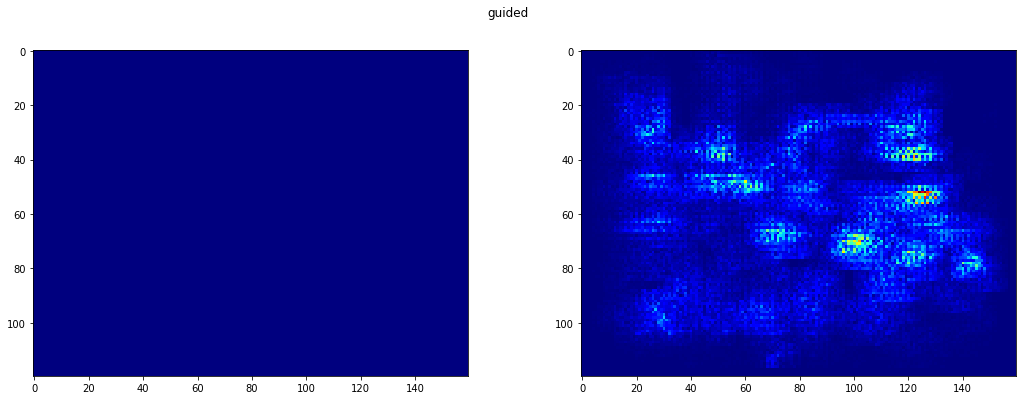

<Figure size 1296x432 with 0 Axes>

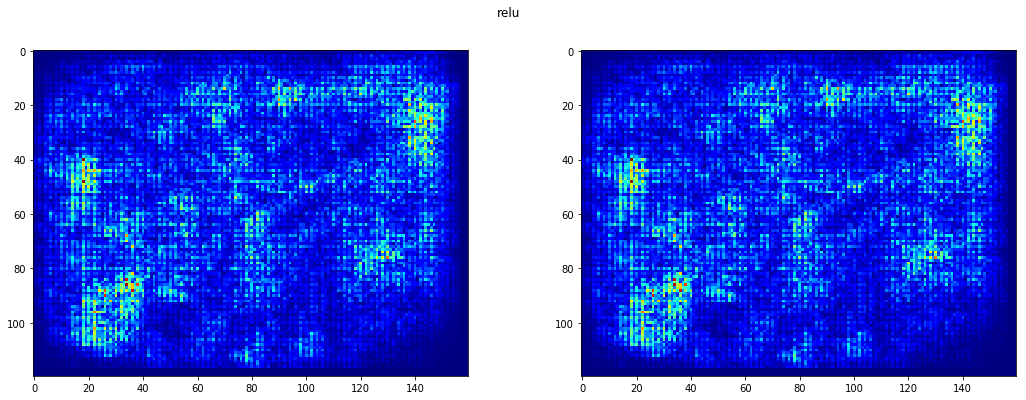

In [73]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=DEFINED_FILTER_INDICES, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

In [45]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 58, 78, 24)   1824        img_in[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 27, 37, 32)   19232       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 23, 33, 64)   51264       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

jet_heatmap.shape=(120, 160, 3, 3)
img.shape=(120, 160, 3)
jet_heatmap.shape=(120, 160, 3, 3)
img.shape=(120, 160, 3)
jet_heatmap.shape=(120, 160, 3, 3)
img.shape=(120, 160, 3)
jet_heatmap.shape=(120, 160, 3, 3)
img.shape=(120, 160, 3)
jet_heatmap.shape=(120, 160, 3, 3)
img.shape=(120, 160, 3)
jet_heatmap.shape=(120, 160, 3, 3)
img.shape=(120, 160, 3)


<Figure size 1296x432 with 0 Axes>

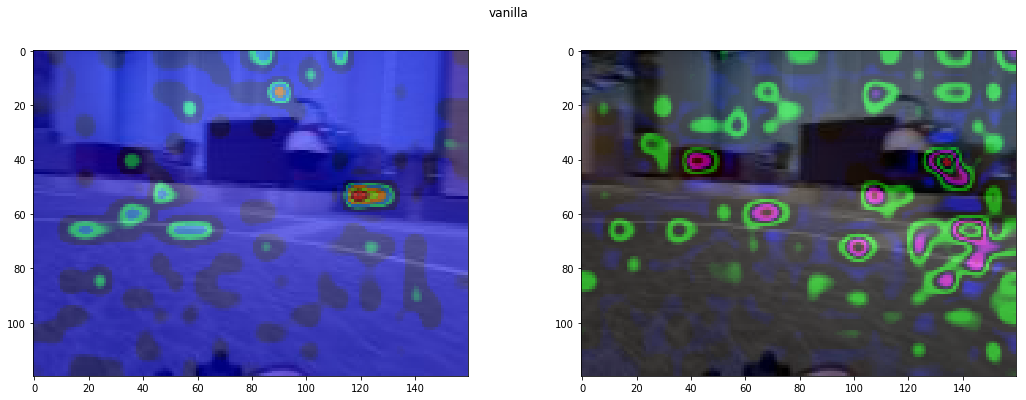

<Figure size 1296x432 with 0 Axes>

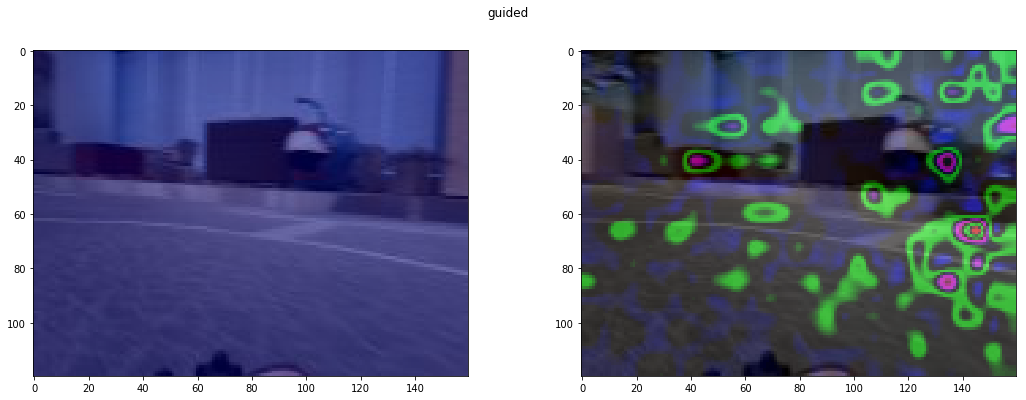

<Figure size 1296x432 with 0 Axes>

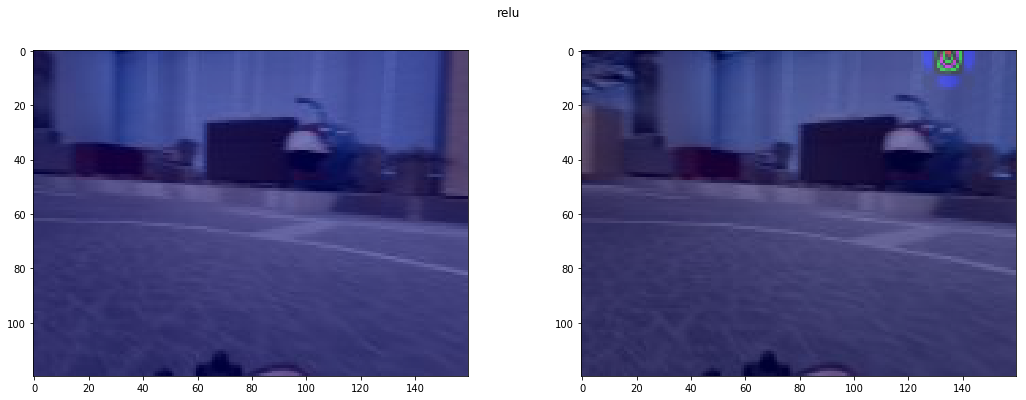

In [74]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'conv2d_5')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=DEFINED_FILTER_INDICES, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[...,:3] * 255)
        print("jet_heatmap.shape={}".format(jet_heatmap.shape))
        print("img.shape={}".format(img.shape))
        ax[i].imshow(overlay(jet_heatmap[..., i], img))